In [23]:
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
import seaborn as sns
import copy
import yfinance as yf
from sklearn.grid_search import GridSearchCV
from pandas import concat, DataFrame
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from pandas_datareader import data as pdr

# Get Dataset

In [5]:
# yf.pdr_override()
# df_full = pdr.get_data_yahoo("TSLA", start="2010-01-01").reset_index()
df_full = pd.read_csv('TSLA.csv')
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


# Explore Data

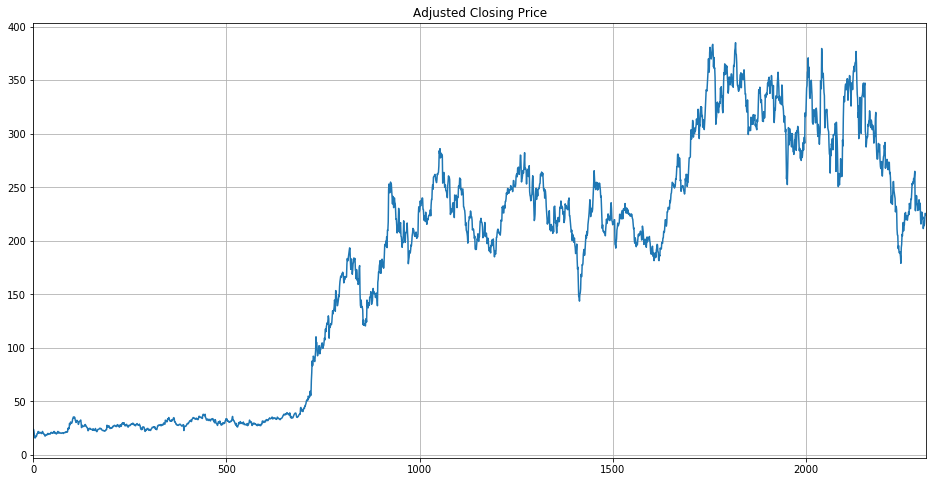

In [6]:
df_full['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

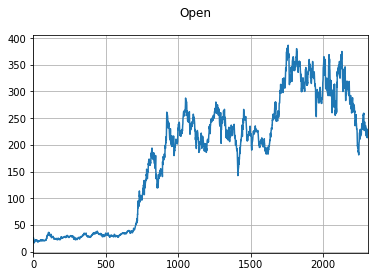

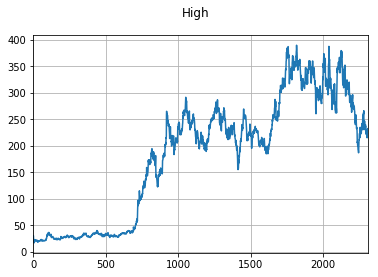

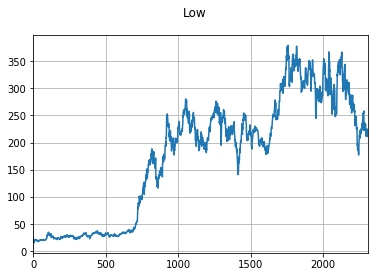

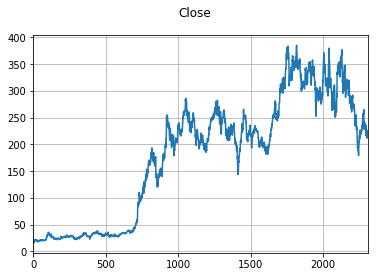

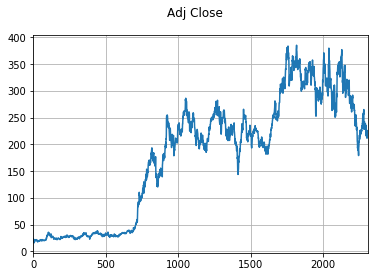

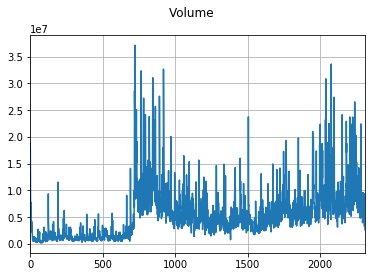

In [7]:
plot_count = 1
for feature in list(df_full.columns)[1:]:
    fig, ax = plt.subplots()
    df_full[feature].plot(label='TSLA', figsize=(15,10.5),grid=True, title=feature, subplots=True, ax=ax)
    plot_count += 1
plt.show()

In [8]:
window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df_full) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)
# print(np.arange(num_samples).astype(np.int)[:,None])
# print(np.arange(window_size + 1).astype(np.int))
# print(indices)
data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
print(data)
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day
print(X)
print(len(X),len(y))

[[ 23.89  23.83  21.96 ...  17.9   17.6   18.32]
 [ 23.83  21.96  19.2  ...  17.6   18.32  18.78]
 [ 21.96  19.2   16.11 ...  18.32  18.78  19.15]
 ...
 [254.86 253.54 258.18 ... 215.59 221.71 225.61]
 [253.54 258.18 255.68 ... 221.71 225.61 225.01]
 [258.18 255.68 260.17 ... 225.61 225.01 224.25]]
[[ 23.89  23.83  21.96 ...  19.03  17.9   17.6 ]
 [ 23.83  21.96  19.2  ...  17.9   17.6   18.32]
 [ 21.96  19.2   16.11 ...  17.6   18.32  18.78]
 ...
 [254.86 253.54 258.18 ... 214.08 215.59 221.71]
 [253.54 258.18 255.68 ... 215.59 221.71 225.61]
 [258.18 255.68 260.17 ... 221.71 225.61 225.01]]
2280 2280


In [9]:
# Preprocess Data
num_samples = len(df_full)
train_index = 0.8

features = ['Open', 'High', 'Low', 'Close', 'Volume']
# X=df_full[features].values
# y=df_full['Adj Close'].values

split = int(num_samples * train_index)
training_data = df_full[:split]
test_data = df_full[split:]
print(len(training_data), len(test_data))
x_train = X[:split]
y_train = y[:split]
x_test = X[split:]
y_test = y[split:]
print(len(x_train), len(y_train), len(x_test), len(y_test))

1849 463
1849 1849 431 431


431


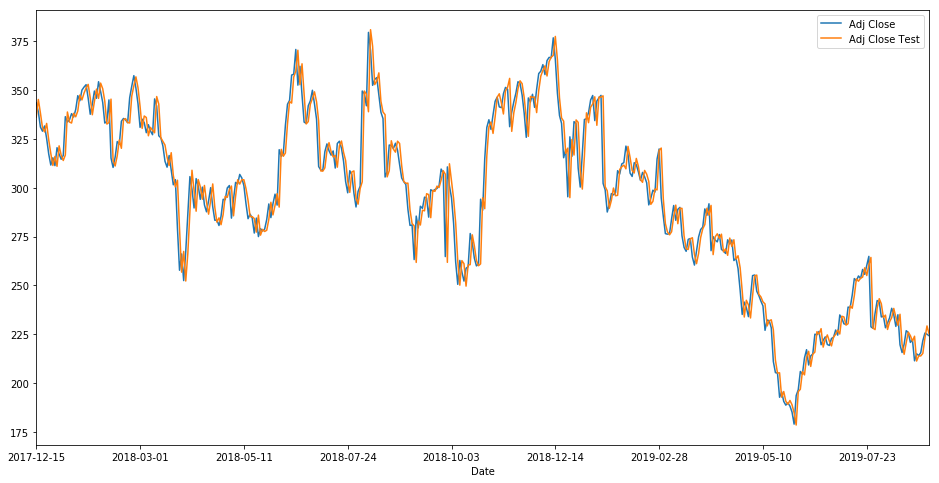

In [10]:
# Create Linear Regression
model = LinearRegression()

# train the model using the training sets
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_line = test_data.copy()

df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[window_size:]
print(len(df_line))

# print(df_line['Adj Close'][:5])
df_line['Adj Close Test'] = y_pred

df_line.set_index('Date', inplace=True)

# # df_full.set_index('Date', inplace=True)
# print(df_line['Adj Close Test'][:5])
# print(df_line)
# print(df_line)
# print(y_test[0])
# print('R2: {}'.format(r2_score(y_test, y_pred)))
# print(len(y_train))
# plt.scatter(range(len(y_test)), y_test, color='black')
# plt.plot(y_pred, color='blue', linewidth=3)
df_line.plot(figsize=(16,8))
# df_line['Adj Close Test'].plot()
plt.show()

431


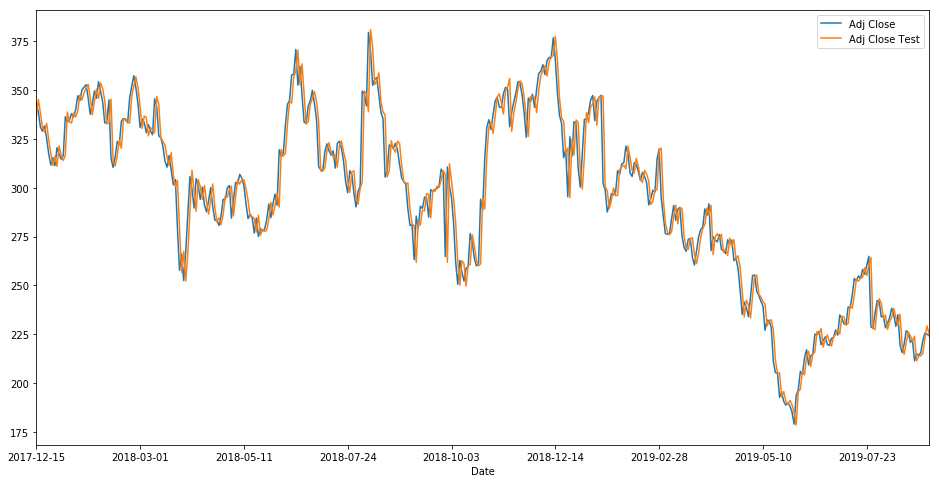

In [11]:
# Create Linear Regression
model = Ridge()

# train the model using the training sets
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_line = test_data.copy()

df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[window_size:]
print(len(df_line))

# print(df_line['Adj Close'][:5])
df_line['Adj Close Test'] = y_pred

df_line.set_index('Date', inplace=True)
df_line.plot(figsize=(16,8))
plt.show()

C:\Users\MyPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


431


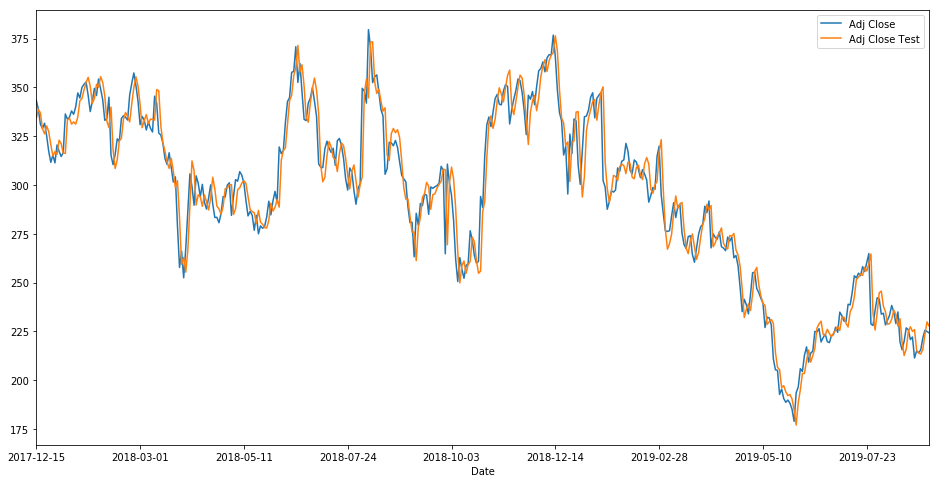

In [12]:
# Create Linear Regression
model = ElasticNet()

# train the model using the training sets
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_line = test_data.copy()

df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[window_size:]
print(len(df_line))

# print(df_line['Adj Close'][:5])
df_line['Adj Close Test'] = y_pred

df_line.set_index('Date', inplace=True)
df_line.plot(figsize=(16,8))
plt.show()

431


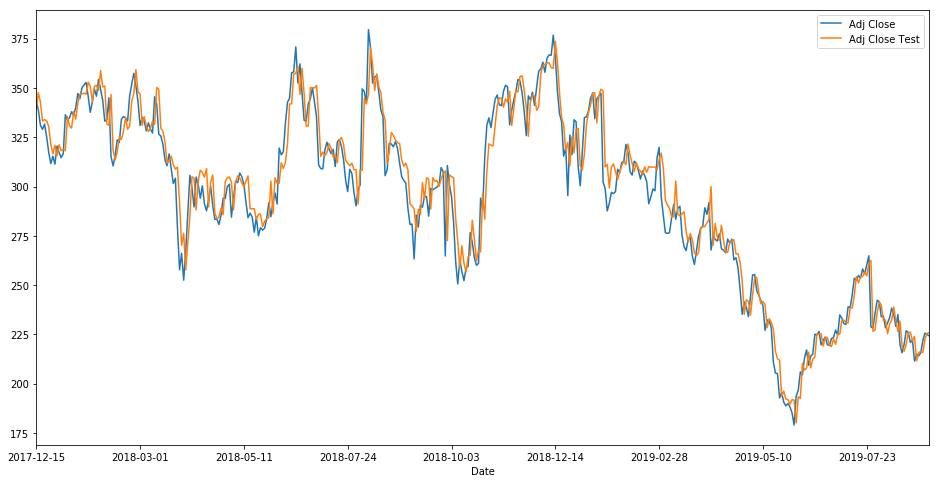

In [13]:
# Create Linear Regression
model = GradientBoostingRegressor()

# train the model using the training sets
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_line = test_data.copy()

df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[window_size:]
print(len(df_line))

# print(df_line['Adj Close'][:5])
df_line['Adj Close Test'] = y_pred

df_line.set_index('Date', inplace=True)
df_line.plot(figsize=(16,8))
plt.show()

431


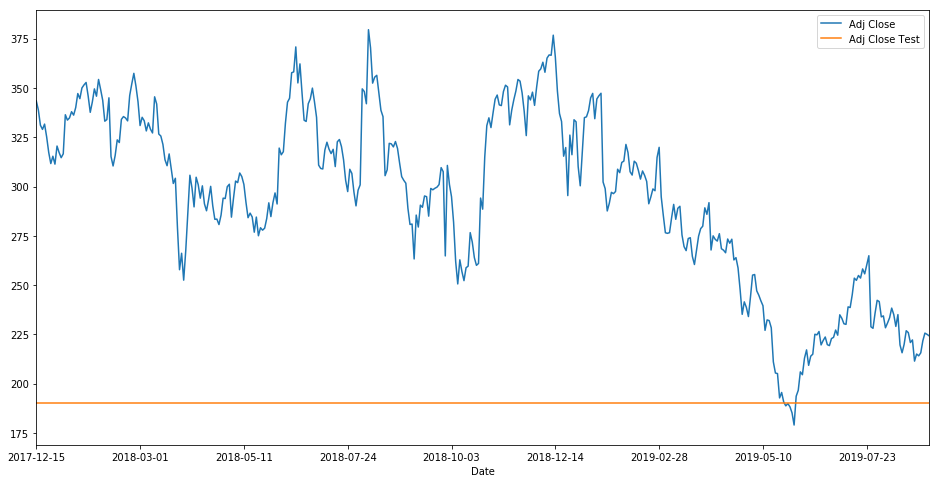

In [14]:
# Create Linear Regression
model = SVR(kernel='rbf')

# train the model using the training sets
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

df_line = test_data.copy()

df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[window_size:]
print(len(df_line))

# print(df_line['Adj Close'][:5])
df_line['Adj Close Test'] = y_pred

df_line.set_index('Date', inplace=True)
df_line.plot(figsize=(16,8))
plt.show()